In [1]:
#Case Study on Donut Data Set using Linear Regression

In [80]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

In [81]:
df_train=pd.read_csv('train.csv')

In [82]:
df_train.head()

,Donut ID,Donut Estimator 1,Donut Area of cross section,Donut Area of circumference circle,Donut area of central hole / Donut Area of circumscribed circle,Donut Estimator 2,Donut Estimator 3,Donut Estimator 4,Donut Estimator 5,Donut volume Estimator 6,Location,Donut Density,Donut volume
0,1,317.61,496.27,682.80,0.27,818.25,788.89,567.20,557.68,579.17,Mumbai,14.3,52.1
1,2,315.19,538.85,645.77,0.17,800.65,798.97,560.37,561.20,577.59,Mumbai,15.8,54.2
2,3,317.44,514.24,661.30,0.22,795.79,801.74,579.30,584.34,575.06,Mumbai,16.3,54.8
3,4,336.62,562.98,709.35,0.20,888.29,862.33,596.66,588.34,629.96,Mumbai,16.6,56.6
4,5,331.76,558.90,635.54,0.12,801.16,811.17,593.59,599.81,586.01,Mumbai,18.3,56.9


In [83]:
df_test=pd.read_csv('test.csv')

In [84]:
df_test.head()

,Donut ID,Donut Estimator 1,Donut Area of cross section,Donut Area of circumference circle,Donut area of central hole / Donut Area of circumscribed circle,Donut Estimator 2,Donut Estimator 3,Donut Estimator 4,Donut Estimator 5,Donut volume Estimator 6,Location,Donut Density,Donut volume
0,1,354.84,512.67,703.84,0.28,801.96,820.74,725.30,759.01,535.97,Mumbai,16.08,51.4
1,2,284.50,419.91,632.08,0.33,698.40,694.26,523.64,522.64,509.75,Mumbai,16.52,55.2
2,3,298.34,450.13,701.23,0.36,798.88,749.28,517.35,502.82,626.46,Mumbai,17.90,57.0
3,4,302.40,472.97,694.86,0.32,798.38,769.71,530.10,522.51,602.89,Mumbai,17.90,57.0
4,5,422.84,726.44,806.40,0.10,1036.23,1048.50,781.72,791.55,710.68,Mumbai,18.80,57.8


In [85]:
#chekcing for null values

df_train.isnull().values.any()

False

In [86]:
df_train.isnull().sum()

Donut ID                                                           0
Donut Estimator 1                                                  0
Donut Area of cross section                                        0
Donut Area of circumference circle                                 0
Donut area of central hole / Donut Area of circumscribed circle    0
Donut  Estimator 2                                                 0
Donut  Estimator 3                                                 0
Donut  Estimator 4                                                 0
Donut  Estimator 5                                                 0
Donut volume Estimator 6                                           0
Location                                                           0
Donut Density                                                      0
Donut volume                                                       0
dtype: int64

In [87]:

df_test.isnull().values.any()

False

In [88]:
## part 3 - handling categorical variables

season_dummies = pd.get_dummies(df_train.Location, prefix='Location')

In [89]:
season_dummies.drop(season_dummies.columns[0], axis=1, inplace=True)

In [90]:
df_train = pd.concat([df_train, season_dummies], axis=1)

In [91]:
df_train.drop(['Donut ID','Location'],axis=1,inplace=True)

In [92]:
df_train.head()

,Donut Estimator 1,Donut Area of cross section,Donut Area of circumference circle,Donut area of central hole / Donut Area of circumscribed circle,Donut Estimator 2,Donut Estimator 3,Donut Estimator 4,Donut Estimator 5,Donut volume Estimator 6,Donut Density,Donut volume,Location_Texas
0,317.61,496.27,682.80,0.27,818.25,788.89,567.20,557.68,579.17,14.3,52.1,0
1,315.19,538.85,645.77,0.17,800.65,798.97,560.37,561.20,577.59,15.8,54.2,0
2,317.44,514.24,661.30,0.22,795.79,801.74,579.30,584.34,575.06,16.3,54.8,0
3,336.62,562.98,709.35,0.20,888.29,862.33,596.66,588.34,629.96,16.6,56.6,0
4,331.76,558.90,635.54,0.12,801.16,811.17,593.59,599.81,586.01,18.3,56.9,0


In [93]:
# create dummy variables for the test data
season_dummies = pd.get_dummies(df_test.Location, prefix='Location')
# drop the first column
season_dummies.drop(season_dummies.columns[0], axis=1, inplace=True)
# concatenate the original DataFrame and the dummy DataFrame (axis=0 means rows, axis=1 means columns)
df_test = pd.concat([df_test, season_dummies], axis=1)
df_test.drop(['Donut ID','Location'],axis=1,inplace=True)
# print 5 random rows
df_test.head()

,Donut Estimator 1,Donut Area of cross section,Donut Area of circumference circle,Donut area of central hole / Donut Area of circumscribed circle,Donut Estimator 2,Donut Estimator 3,Donut Estimator 4,Donut Estimator 5,Donut volume Estimator 6,Donut Density,Donut volume,Location_Texas
0,354.84,512.67,703.84,0.28,801.96,820.74,725.30,759.01,535.97,16.08,51.4,0
1,284.50,419.91,632.08,0.33,698.40,694.26,523.64,522.64,509.75,16.52,55.2,0
2,298.34,450.13,701.23,0.36,798.88,749.28,517.35,502.82,626.46,17.90,57.0,0
3,302.40,472.97,694.86,0.32,798.38,769.71,530.10,522.51,602.89,17.90,57.0,0
4,422.84,726.44,806.40,0.10,1036.23,1048.50,781.72,791.55,710.68,18.80,57.8,0


In [97]:
df_test.columns=df_train.columns

In [99]:
## Part 4 visualize data 
plt.rcParams['figure.figsize'] = (8, 6)
plt.rcParams['font.size'] = 14

In [100]:
feature_cols = [val for val in df_train.columns if val not in ['Donut Density','Donut volume']]
feature_cols

['Donut Estimator 1',
 'Donut Area of cross section',
 'Donut Area of circumference circle',
 'Donut area of central hole / Donut Area of circumscribed circle',
 'Donut  Estimator 2',
 'Donut  Estimator 3',
 'Donut  Estimator 4',
 'Donut  Estimator 5',
 'Donut volume Estimator 6',
 'Location_Texas']

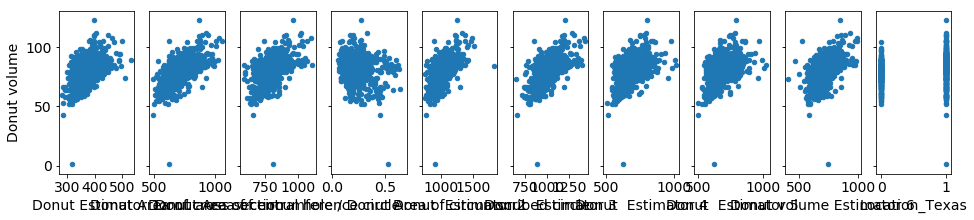

In [102]:
# multiple scatter plots in Pandas
fig, axs = plt.subplots(1, len(feature_cols), sharey=True)
for index, feature in enumerate(feature_cols):
    df_train.plot(kind='scatter', x=feature, y='Donut volume', ax=axs[index], figsize=(16, 3))

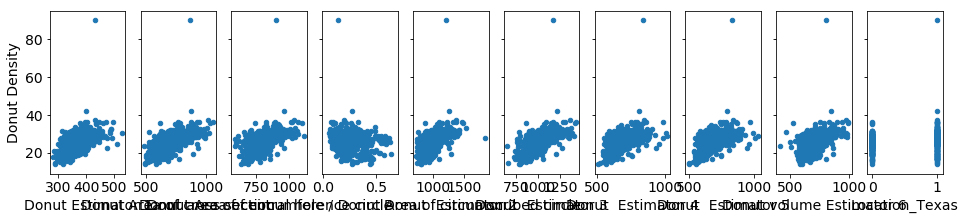

In [103]:
# multiple scatter plots in Pandas
fig, axs = plt.subplots(1, len(feature_cols), sharey=True)
for index, feature in enumerate(feature_cols):
    df_train.plot(kind='scatter', x=feature, y='Donut Density', ax=axs[index], figsize=(16, 3))

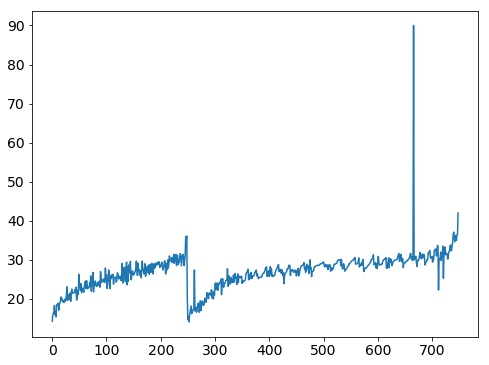

In [104]:
df_train['Donut Density'].plot()

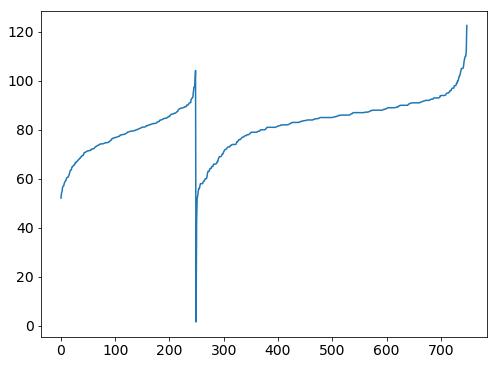

In [105]:
df_train['Donut volume'].plot()

In [120]:
## Multicollinearity 

def remove_collinear_features(x, target , threshold):
    # # Define y and x
    y = x[target]
    x = x.drop(columns = [target])
    # Calculate the correlation matrix
    corr_matrix = x.corr()
    iters = range(len(corr_matrix.columns) - 1)
    drop_cols = []
    
    # Iterate through the correlation matrix and compare correlations
    for i in iters:
        for j in range(i):
            item = corr_matrix.iloc[j:(j+1), (i+1):(i+2)]
            col = item.columns
            row = item.index
            val = abs(item.values)
            
            # If correlation exceeds the threshold
            if val >= threshold:
                # Print the correlated features and the correlation value
                print(col.values[0], "|", row.values[0], "|", round(val[0][0], 2))
                drop_cols.append(col.values[0])
                # Drop one of each pair of correlated columns
            drops = set(drop_cols)
            x = x.drop(columns = drops)
            # Add the score back in to the data
            x[target] = y
    return x

import matplotlib.pyplot as plt
def plot_line(y, predicted,target):
    fig, ax = plt.subplots()
    ax.scatter(y, predicted, edgecolors=(0, 1, 1))
    ax.plot([y.min(), y.max()], [y.min(), y.max()], 'k--', lw=4)
    ax.set_xlabel('Actual {} '.format(target))
    ax.set_ylabel('Predicted {} '.format(target))
    plt.show()
    


In [108]:
# Creating baseline with null RMSE

#X_train, X_test, y_train, y_test = df_train[['Donut Estimator 1', 'Donut Area of cross section','Donut Area of circumference circle', 'Donut area of central hole / Donut Area of circumscribed circle', 'Donut  Estimator 2', 'Donut  Estimator 3', 'Donut  Estimator 4', 'Donut  Estimator 5', 'Donut volume Estimator 6', 'Location_Texas']] , df_test[['Donut Estimator 1', 'Donut Area of cross section','Donut Area of circumference circle', 'Donut area of central hole / Donut Area of circumscribed circle', 'Donut  Estimator 2', 'Donut  Estimator 3', 'Donut  Estimator 4', 'Donut  Estimator 5', 'Donut volume Estimator 6', 'Location_Texas']] , df_train['Donut volume'] , df_test['Donut volume']

X_train = df_train[['Donut Estimator 1',
 'Donut Area of cross section',
 'Donut Area of circumference circle',
 'Donut area of central hole / Donut Area of circumscribed circle',
 'Donut  Estimator 2',
 'Donut  Estimator 3',
 'Donut  Estimator 4',
 'Donut  Estimator 5',
 'Donut volume Estimator 6',
 'Location_Texas']]

X_test = df_test[['Donut Estimator 1',
 'Donut Area of cross section',
 'Donut Area of circumference circle',
 'Donut area of central hole / Donut Area of circumscribed circle',
 'Donut  Estimator 2',
 'Donut  Estimator 3',
 'Donut  Estimator 4',
 'Donut  Estimator 5',
 'Donut volume Estimator 6',
 'Location_Texas']]
y_train=df_train['Donut volume']
y_test=df_test['Donut volume']

from sklearn import metrics
y_null = np.zeros_like(y_test, dtype=float)
# fill the array with the mean value of y_test
y_null.fill(y_test.mean())
    # compute null RMSE
rmse = np.sqrt(metrics.mean_squared_error(y_test, y_null))
baseline_guess = np.median(y_train)
print('The baseline guess for %s is a score of %0.2f' % ('Donut Volume',baseline_guess))
print("Baseline Performance on the test set for %s : RMSE = %0.4f" % ('Donut Volume',rmse))

The baseline guess for Donut Volume is a score of 83.40
Baseline Performance on the test set for Donut Volume : RMSE = 10.5856


In [115]:
df_test.columns

Index(['Donut Estimator 1', 'Donut Area of cross section',
       'Donut Area of circumference circle',
       'Donut area of central hole / Donut Area of circumscribed circle',
       'Donut  Estimator 2', 'Donut  Estimator 3', 'Donut  Estimator 4',
       'Donut  Estimator 5', 'Donut volume Estimator 6', 'Donut Density',
       'Donut volume', 'Location_Texas'],
      dtype='object')

In [116]:
df_train.columns


Index(['Donut Estimator 1', 'Donut Area of cross section',
       'Donut Area of circumference circle',
       'Donut area of central hole / Donut Area of circumscribed circle',
       'Donut  Estimator 2', 'Donut  Estimator 3', 'Donut  Estimator 4',
       'Donut  Estimator 5', 'Donut volume Estimator 6', 'Donut Density',
       'Donut volume', 'Location_Texas'],
      dtype='object')

In [114]:
feature_cols

['Donut Estimator 1',
 'Donut Area of cross section',
 'Donut Area of circumference circle',
 'Donut area of central hole / Donut Area of circumscribed circle',
 'Donut  Estimator 2',
 'Donut  Estimator 3',
 'Donut  Estimator 4',
 'Donut  Estimator 5',
 'Donut volume Estimator 6',
 'Location_Texas']

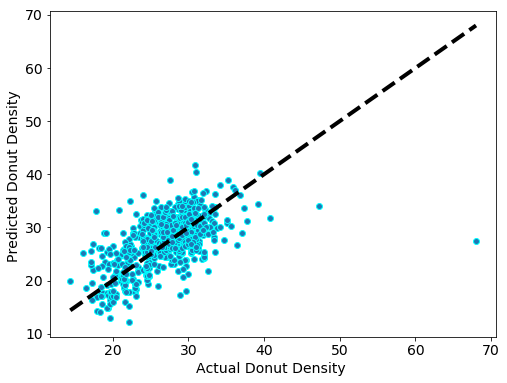

4.205028275576077


[('Donut Estimator 1', 0.019969286018916798),
 ('Donut Area of cross section', 0.05682437811682049),
 ('Donut Area of circumference circle', -0.011141124820617118),
 ('Donut area of central hole / Donut Area of circumscribed circle',
  18.375328998805298),
 ('Donut  Estimator 2', -0.013662198041064878),
 ('Donut  Estimator 3', 0.03211097048326232),
 ('Donut  Estimator 4', 0.0005844272728151544),
 ('Donut  Estimator 5', 0.00161392171823687),
 ('Donut volume Estimator 6', -0.05474623086568385),
 ('Location_Texas', -2.392343072154359)]

In [109]:
## Fitting on entire features
from sklearn.linear_model import LinearRegression

# define a function that accepts a list of features and returns testing RMSE
def train_test_rmse(train_df,test_df,feature_cols,target):
    X = train_df[feature_cols] 
    y = train_df[target] 
    X_train, X_test, y_train, y_test = df_train[feature_cols] , df_test[feature_cols] , df_train[target] , df_test[target] 
    linreg = LinearRegression()
    linreg.fit(X_train, y_train)
    y_pred = linreg.predict(X_test)
    
    plot_line(y_test,y_pred,target)
    return linreg,np.sqrt(metrics.mean_squared_error(y_test, y_pred))
# compare different sets of features
# ‘Donut Density’, ‘Donut volume’
# Donut Density
linreg,rmse_ = train_test_rmse(df_train,df_test,feature_cols,'Donut Density')
print (rmse_)
#print(linreg.score(X_test, y_test))
# pair the feature names with the coefficients
list(zip(feature_cols, linreg.coef_))

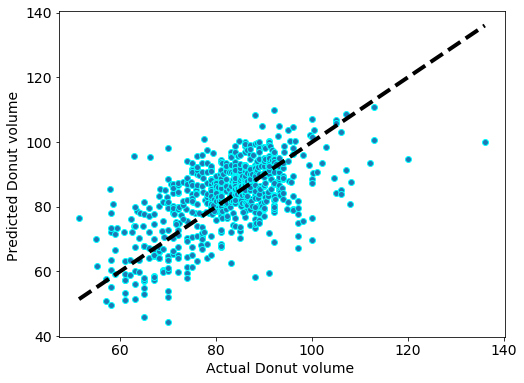

9.625589368125116


[('Donut Estimator 1', 0.01516775631814478),
 ('Donut Area of cross section', 0.12148190231268612),
 ('Donut Area of circumference circle', -0.06206356694137044),
 ('Donut area of central hole / Donut Area of circumscribed circle',
  49.63679964426232),
 ('Donut  Estimator 2', -0.01659084417136343),
 ('Donut  Estimator 3', 0.11042763208930223),
 ('Donut  Estimator 4', 0.0041409286467930795),
 ('Donut  Estimator 5', 0.0004012495544917713),
 ('Donut volume Estimator 6', -0.1388884821714831),
 ('Location_Texas', -5.6745423466466445)]

In [110]:
# Donut volume'
linreg,rmse_ = train_test_rmse(df_train,df_test,feature_cols,'Donut volume')
print (rmse_)
# pair the feature names with the coefficients
list(zip(feature_cols, linreg.coef_))

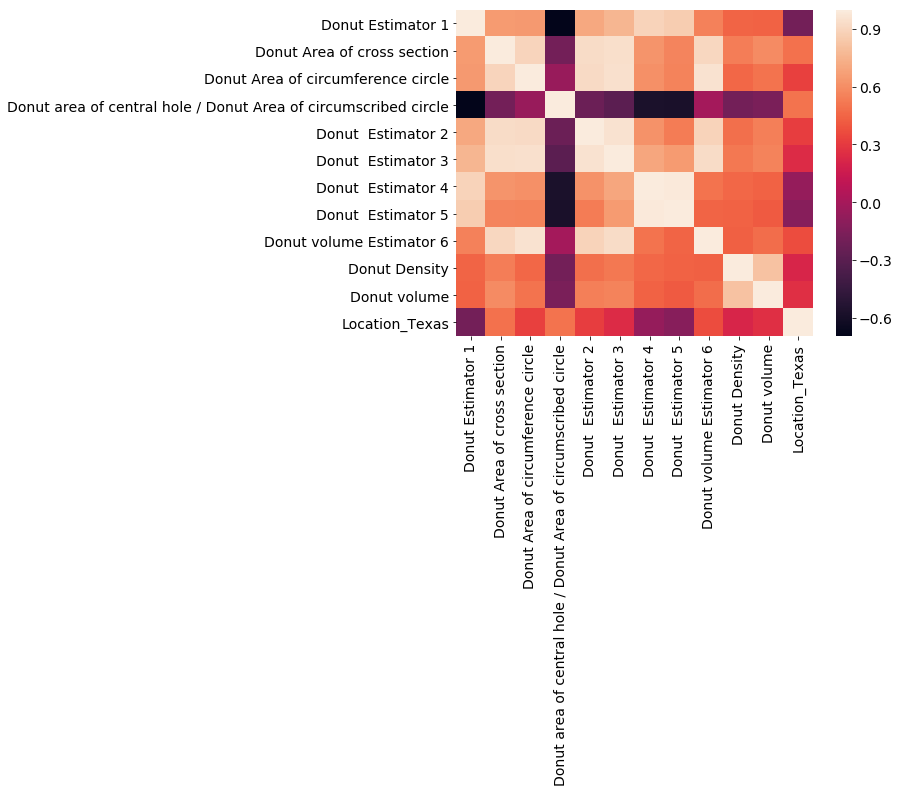

In [111]:
# treating multicollinearity

# visualize correlation matrix in Seaborn using a heatmap
sns.heatmap(df_train.corr())